# ML as optimization

## Math behind 

$J(\theta) = \frac 1 n \sum_{i=1}^n L(hypothesis, actuall)$

L is cross entropy loss: 

$ L(h_\theta, y) = - [y * \log h_\theta + (1-y) * \log (1 - h_\theta)]$

Hypothesis:

$h_\theta (x)= \frac 1 {1+e^{-\theta^T x}} $

*Goal*: Find theta that minimizes J

### Matrix representation

$ \theta_{i+1} = \theta_i - \alpha(\frac 1 n X^T(\sigma(X\theta - y))) $

### Augmentation

$ \theta^T x + \theta_0 = \theta^{* T} x ^* $

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [4]:
# Loss function: log likelihood
def compute_loss(y, hx):
    return -np.mean(y * np.log(hx) + (1 - y) * np.log(1 - hx))

In [5]:
# Gradient of the loss
def compute_gradient(X, y, hx):
    return np.dot(X.T, (hx - y)) / y.shape[0]

In [6]:
# Dataset

X = np.array([[2, 1],
              [3, 2],
              [4, 4],
              [1, 5],
              [2, 6],
              [3, 7]
])

y = np.array([1, 1, 1, 0, 0, 0]) # labels

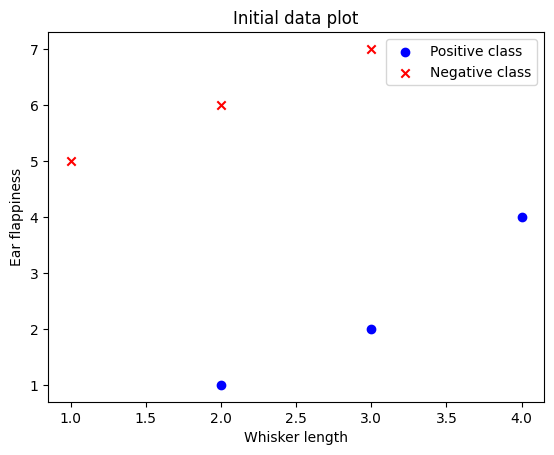

In [7]:
# Plot initial data
plt.scatter(X[:3, 0], X[:3, 1], c='blue', marker = 'o', label='Positive class')
plt.scatter(X[3:, 0], X[3:, 1], c='red', marker = 'x', label='Negative class')
plt.xlabel('Whisker length')
plt.ylabel('Ear flappiness')
plt.legend()
plt.title('Initial data plot')
plt.show()

In [ ]:
def plot_decision_boundary(X, y, weights, loss, iteration):
    plt.scatter(X[:3, 0], X[:3, 1], c='blue', marker = 'o', label='Positive class' if iteration == 0 else "")
    plt.scatter(X[3:, 0], X[3:, 1], c='red', marker = 'x', label='Negative class' if iteration == 0 else "")

    # Extend the x values a bit beyond the min and max for better visualization
    x_values = np.array([np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1])
    y_values = -(weights[0] + x_values * weights[1]) / weights[2]
    plt.plot(x_values, y_values, "k")

    plt.xlim(x_values[0], x_values[1])
    plt.ylim(np.min(X[:, 2]) - 1, np.max(X[:, 2]) + 1)
    plt.xlabel('Whisker length')
    plt.ylabel('Ear flappiness')
    plt.title(f"Decision Boundary at iteration {iteration}\nLoss: {loss}")
    if iteration == 0:
        plt.legend()
    plt.show()

In [ ]:
# Logistic regression model

def logistic_regression(X, y, learning_rate=0.1, num_iterations=10):
    # Add intercept term to X
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Initialize weights
    weights = np.zeros(X.shape[1])

    # Gradient descent
    for i in range(num_iterations):
        z = np.dot(X, weights)
        hx = sigmoid(z)
        loss = compute_loss(y, hx)
        gradient = compute_gradient(X, y, hx)
        weights -= learning_rate * gradient

        plot_decision_boundary(X, y, weights, loss, i)
        print(f"Iteration {i}: Theta: {weights}, Loss: {loss}")
    return weights